In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [3]:
data=pd.read_csv('C:\\Users\\hp\\Desktop\\Data science assignment\\delivery_time.csv')
data

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


In [4]:
data.head()

,Delivery Time,Sorting Time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [5]:
data.tail()

,Delivery Time,Sorting Time
16,13.75,6
17,18.11,7
18,8.00,2
19,17.83,7
20,21.50,5


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Delivery Time  21 non-null     float64
 1   Sorting Time   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [8]:
## Correlation
data.corr()

,Delivery Time,Sorting Time
Delivery Time,1.000000,0.825997
Sorting Time,0.825997,1.000000


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Delivery Time', ylabel='Density'>

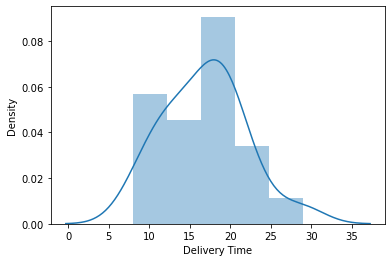

In [9]:
sns.distplot(data['Delivery Time'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Sorting Time', ylabel='Density'>

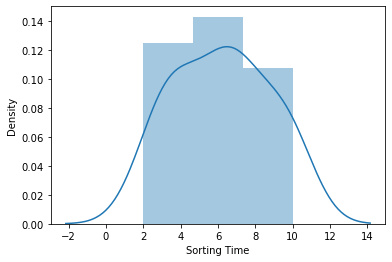

In [10]:
sns.distplot(data['Sorting Time'])

In [11]:
## Renaming Columns
data=data.rename({'Delivery Time':'delivery_time','Sorting Time':'sorting_time'},axis=1)
data

,delivery_time,sorting_time
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10
5,15.35,6
6,19.00,7
7,9.50,3
8,17.90,10
9,18.75,9


Fitting a linear regression model

In [13]:
import statsmodels.formula.api as smf
model=smf.ols('delivery_time~sorting_time',data=data).fit()

<AxesSubplot:xlabel='sorting_time', ylabel='delivery_time'>

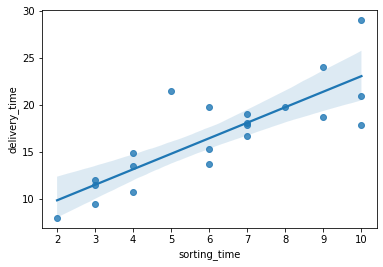

In [14]:
sns.regplot(x='sorting_time', y='delivery_time',data=data)

In [15]:
# Coefficients
model.params

Intercept       6.582734
sorting_time    1.649020
dtype: float64

In [16]:
# t-value and p-value
print(model.tvalues, '\n',model.pvalues)

Intercept       3.823349
sorting_time    6.387447
dtype: float64 
 Intercept       0.001147
sorting_time    0.000004
dtype: float64


In [17]:
##R squared
(model.rsquared,model.rsquared_adj)

(0.6822714748417231, 0.6655489208860244)

# Model Predictions

In [19]:
## Prediction for sorting time 4
delivery_time=(6.582734) + (1.649020)*(4)
delivery_time

13.178814

In [21]:
# Automatic prediction for sorting time 4,8
new_data=pd.Series([4,8])
new_data

0    4
1    8
dtype: int64

In [22]:
data_pred=pd.DataFrame(new_data,columns=['sorting_time'])
data_pred

,sorting_time
0,4
1,8


In [23]:
model.predict(data_pred)

0    13.178814
1    19.774893
dtype: float64